In [ ]:
# 1A

# Construct a 10x10 matrix A of ones
# (https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)
# Substitute the value in position (8,8) with 4
# Extract and print out the 3x3 submatrix B corresponding to the last three rows and columns of the matrix (lower right)
# Create and print out B^2 (B@B)
# Create and print out B^2 elementwise 

import numpy as np

M = np.ones((10, 10))
M[8, 8] = 4
B = M[-3:, -3:] # B = M[7:, 7:]
print(f"B =\n {B}")
print(f"B^2 =\n {B @ B}") # print(f"B^2 = {np.dot(B, B)}")
print(f"B^2 elementwise =\n {B * B}")

B =
 [[1. 1. 1.]
 [1. 4. 1.]
 [1. 1. 1.]]
B^2 =
 [[ 3.  6.  3.]
 [ 6. 18.  6.]
 [ 3.  6.  3.]]
B^2 elementwise =
 [[ 1.  1.  1.]
 [ 1. 16.  1.]
 [ 1.  1.  1.]]


In [ ]:
# 1B

# Construct a 3x2 matrix M of random numbers
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
# Reduce the matrix using the sum and mean operations over its rows and columns
# Finally, provide the total sum and mean of the matrix
# (Naturally, results will vary based on the random numbers)

import numpy as np

M = np.random.rand(3, 2)
print(f"M =\n {M}")
total_sum, sum_over_rows, sum_over_cols = M.sum(), np.sum(M, 0), np.sum(M, 1)
print(f"Total sum: {total_sum}, Sum over rows: {sum_over_rows}, Sum over cols: {sum_over_cols}")
total_mean, mean_over_rows, mean_over_cols = M.mean(), np.mean(M, 0), np.mean(M, 1)
print(f"Total mean: {total_mean}, Mean over rows: {mean_over_rows}, Mean over cols: {mean_over_cols}")

M =
 [[0.64665238 0.91745346]
 [0.9065539  0.25010455]
 [0.99249276 0.18005114]]
Total sum: 3.8933081807594583, Sum over rows: [2.54569904 1.34760914], Sum over cols: [1.56410583 1.15665845 1.1725439 ]
Total mean: 0.648884696793243, Mean over rows: [0.84856635 0.44920305], Mean over cols: [0.78205292 0.57832922 0.58627195]


In [ ]:
# 1C

# Initialize two vectors v1 and v2 with values [0 0] and [1 1].
# Assuming the values of the vectors represent carthesian coordinates (x,y) calculate the Euclidean distance between
# the two points.

v1, v2 = np.array([0, 0]), np.array([1, 1])
euclidean_distance = np.linalg.norm(v2 - v1) # np.sqrt(np.dot(v2 - v1, v2 - v1))
print(f"Euclidean distance between the vectors: {euclidean_distance}")

Euclidean distance between the vectors: 1.4142135623730951


In [ ]:
# 2A

# Matrices U and V are given. Each row of U and V corresponds to a point in 2D Euclidean space. 
# Construct a distance matrix D for which an element D(i,j) 
# contains the Euclidean distance between U(i,:) and V(j,:)

import numpy as np

U = np.array([[0, 0],[0, 1],[1, 0]])
V = np.array([[-1, -1],[1, 1],[4, 4]])

D = np.zeros((3, 3))
for iv, v in enumerate(V):
  for iu, u in enumerate(U):
    D[iv, iu] = np.linalg.norm(u - v)

print(f"D =\n {D}")

D =
 [[1.41421356 2.23606798 2.23606798]
 [1.41421356 1.         1.        ]
 [5.65685425 5.         5.        ]]


In [ ]:
# 2B

# Generate a random number with the command np.random.normal() (sampled from a standard normal distribution). 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
# Assign to a variable y the value 1 if that number is between -1 and 1 (mean +- standard deviation), 0 otherwise.
# (In python, intersection(AND) is done with the keyword "and". To do "and" between two numpy vectors: np.bitwise_and)
# If I repeat the process 10000 times, how many times does the random number fall in the interval [-1 1]?
# Do the exercise using a loop, and then try to solve the problem without one.

import numpy as np

x = np.random.normal()
print(f"x = {x}")
y = 1 if x > -1 and x < 1 else 0
print(f"y = {y}")

cnt, max_samples = 0, 10000
for i in range(0, max_samples):
  x = np.random.normal()
  cnt += 1 if x > -1 and x < 1 else 0
print(f"x falls between -1 and 1 {cnt} times")

# Not using a loop (way faster)
x = np.random.normal(size = (1, max_samples))
y = np.bitwise_and(x <= 1, x >= -1).astype(int)
print(f"x falls between -1 and 1 {y.sum()} times")

x = 0.8485589168614521
y = 1
x falls between -1 and 1 6798 times
x falls between -1 and 1 6774 times


Image shape: (720, 480)
Max value: 255 , min value: 0


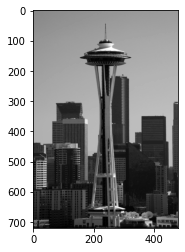

In [9]:
# 3A

# Upload the image "seattle.png" do Colab, load it and assign it to the variable I.
# https://pillow.readthedocs.io/en/stable/reference/Image.html
# Extract the numpy array from the loaded image and display it with the imshow command. Print out its shape.
# Print out the minimum and maxium values contained in the matrix.
# https://stackoverflow.com/questions/384759/how-to-convert-a-pil-image-into-a-numpy-array/37675266
# Diplay the loaded image
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

I = Image.open("seattle.png")
im = np.array(I)
print("Image shape:", im.shape)
print("Max value:", np.max(im), ", min value:", np.min(im))
plt.imshow(im, cmap="gray")
plt.show()

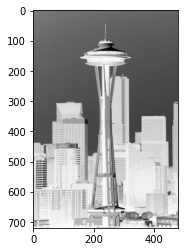

Original mean: 105.54706886574074 , inverted mean: 149.45293113425927


In [10]:
# 3B

# Using the numpy array from above and the information you printed, try to understand what each element in 
# the matrix represents. Use that information to perform an "invertion filter" on the image, meaning that 
# you "switch" the black and white colors. 
# Hint: Since the image is in black and white (grayscale), this translatates to simply switchting 
# the gray level of each pixel based on a maximum value.
# Print out the means of the normal image and the inverted image.

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

I = Image.open("seattle.png")
im = np.array(I)
invIm = np.abs(255-im)
plt.imshow(invIm, cmap="gray")
plt.show()
print("Original mean:", np.mean(im), ", inverted mean:", np.mean(invIm))